In [15]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

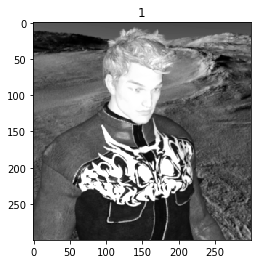

In [32]:
def readtrain():
    datas = []
    labels = []
    files = os.listdir("train")
    for file in files:
        if "horse" in file:
            label = 0
        else:
            label = 1
        with open(os.path.join("train/",file), "rb") as f:
            img = Image.open(f).convert("L")
        img = np.asarray(img)
        datas.append(img)
        labels.append(label)
    return datas, labels
trains, lables = readtrain()
plt.imshow(trains[-1], cmap="gray")
plt.title(lables[-1])
plt.show()

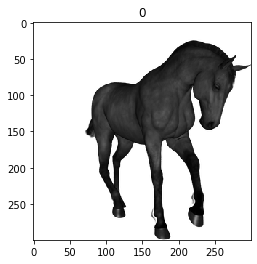

In [30]:
def readtest():
    datas = []
    labels = []
    files = os.listdir("validation")
    for file in files:
        if "horse" in file:
            label = 0
        else:
            label = 1
        with open(os.path.join("validation/",file), "rb") as f:
            img = Image.open(f).convert("L")
        img = np.asarray(img)
        datas.append(img)
        labels.append(label)
    return datas, labels
tests, labels = readtest()
plt.imshow(tests[0], cmap="gray")
plt.title(labels[0])
plt.show()